<a href="https://colab.research.google.com/github/AdamMcCloskey381/machine-learning/blob/main/Perceptron_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

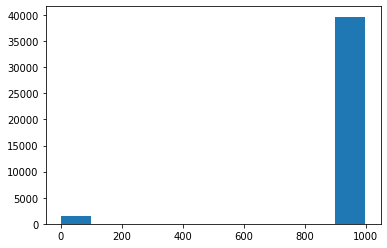

In [78]:
df = pd.read_csv(r"/content/bank-additional-full.csv", delimiter = ';')
df_raw = df.copy()

import matplotlib.pyplot as plt
plt.hist(df['pdays'])
df = df.loc[:, df.columns !='pdays']
df.replace('unknown', np.nan)

pd.set_option('display.max_columns', None)

In [79]:
df_category = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
            'poutcome', 'y']
df_numerical = df.columns.tolist()
  
for col in df_category:
            df[col] = df[col].astype('category')

for i in range(len(df_category)):
  df_numerical.remove(df_category[i])

for col in df_numerical:
  df[col] = df[col].astype('float64')

In [80]:
le = LabelEncoder()
scaler = StandardScaler()

In [81]:
df_ordinal = ['education']
df_category.remove(df_ordinal[0])

In [83]:
df[df_ordinal[0]] = le.fit_transform(df[df_ordinal[0]])
df = pd.get_dummies(df, drop_first = True, columns = df_category)
for col in df_numerical:
  df[[col]] = scaler.fit_transform(df[[col]])

In [100]:
from sklearn.linear_model import Perceptron
pnp = Perceptron()

In [108]:
x = df.loc[:, df.columns != 'y_yes']
y = df.loc[:, df.columns == 'y_yes']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 1)

In [110]:
y_train = np.ravel(y_train)
pnp.fit(x_train, y_train)

Perceptron()

In [111]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pnp.predict(x_test))
score

0.8928274139844617

In [114]:
import pickle
with open('google_pnp.pkl', 'wb') as fh:
  pickle.dump(pnp, fh)